# Notes

* Data analysis - hypothesis tests, confidence intervals, p-values?
* Parch = parents or children. Is this a useful feature on its own? Before trying to split into parents/children (e.g. by checking for family names), see if parch is statistically significant.
* Sibsp = siblings or spouses
* Would it be useful to create a categorical variable from "Age" that denotes child, teen, young adult, etc.?
* Is it useful to split the data by "Survived" and check for statistical significance between the distributions?
* Besides correlation, are there ways to analyze categorical-categorical relationships? What about categorical-numerical relationships?
    * I think you need to make a distinction b/w ordinal and nominal attributes as well. I don't think you can use correlation for nominal attributes.
* Does it make sense to take the most promising features based on univariate analysis and look more closely at the multivariate analysis?
* Calculate survival rate by age after histogram binning? This is like converting numerical to categorical. Is this useful for feature engineering or just visualization? Statistical testing?

# Load libraries and datasets

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_csv("./titanic/train.csv")
df_test = pd.read_csv("./titanic/test.csv")

# First view of the training data

In [4]:
df = df_train
df = df.astype({"Pclass": "category", "Sex": "category", "Embarked": "category", "Survived": "category"})
# print(df.info())
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208
std,257.353842,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,38.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


In [74]:
df.describe(include="category")

,Survived,Pclass,Sex,Embarked
count,891,891,891,889
unique,2,3,2,3
top,0,3,male,S
freq,549,491,577,644


In [75]:
print(f"Number of samples = {df.shape[0]}, number of attributes = {df.shape[1]}\n")
# print(f"Attributes = {df.columns}\n")
print(f"Number of duplicates = {sum(df.duplicated())}\n")
print(f"Percentage of missing values = {round(df.isna().sum().sum() / df.size * 100, 1)}\n")

print("Data Types\n---------------------")
print(df.dtypes)
print("")

print("Missing Values\n---------------------------")
print(df.isna().sum())
print("")

# print(df.isna().sum().sum()

# df.describe()
# df.describe(include="object")


Number of samples = 891, number of attributes = 12

Number of duplicates = 0

Percentage of missing values = 8.1

Data Types
---------------------
PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object

Missing Values
---------------------------
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64



# Taking natural log

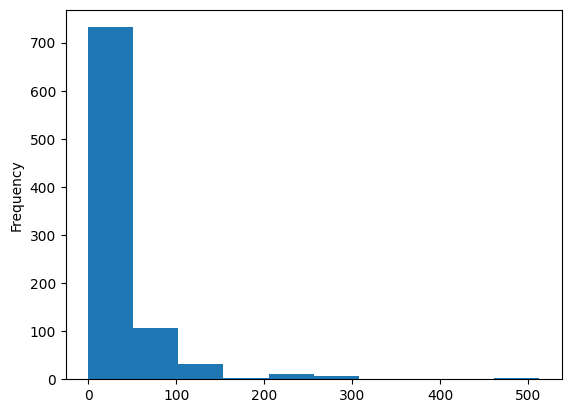

In [26]:
df_num = df.select_dtypes(include=["int64", "float64"]).drop(["PassengerId"], axis="columns").copy()
# df_num.columns
# df_num["Fare"] = np.log(df_num["Fare"].replace(0, np.nan))
df_num["Fare"].plot(kind="hist")
plt.show()
# for col in ["Fare"]:
#     df_num[col] = np.log(df_num[col])
# df_num.head()
# sum(df_num["Fare"] == 0) # 15 people got on for free

# Univariate analysis

## Numerical attributes

In [143]:
df.select_dtypes(include=["int64", "float64"]).columns

Index(['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare', 'TotalFam'], dtype='object')

In [145]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

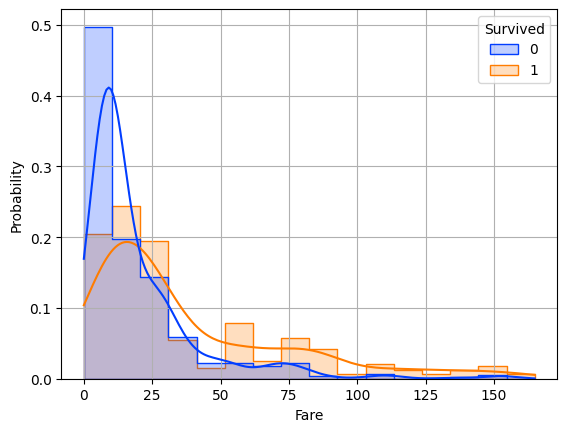

In [151]:
ax = sns.histplot(df.loc[df["Fare"] < 200], x="Fare", hue="Survived", stat="probability", \
                  binwidth=10, common_norm=False, multiple="layer", \
                  element="step", kde=True, kde_kws={"bw_adjust": 1}, palette="bright")
ax.grid()

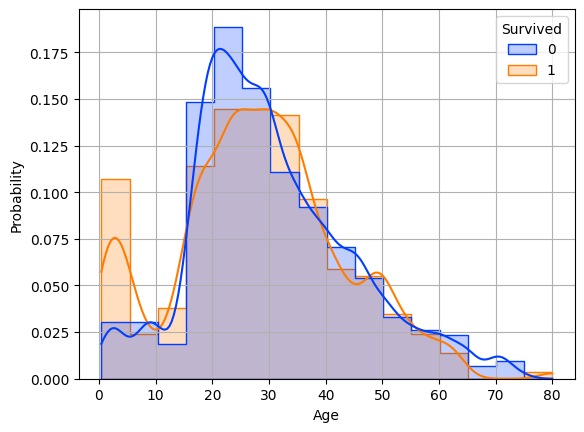

In [175]:
ax = sns.histplot(df, x="Age", hue="Survived", stat="probability", \
                  binwidth=5, common_norm=False, multiple="layer", \
                  element="step", kde=True, kde_kws={"bw_adjust": 0.5}, palette="bright")
ax.grid()

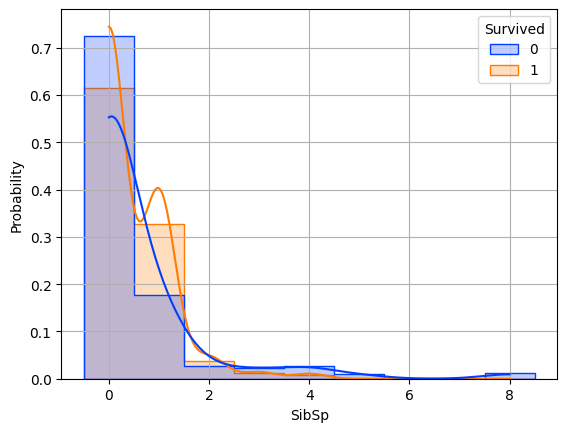

In [102]:
ax = sns.histplot(df, x="SibSp", hue="Survived", stat="probability", \
                  discrete=True, common_norm=False, multiple="layer", \
                  element="step", kde=True, kde_kws={"bw_adjust": 1.5}, palette="bright")
ax.grid()

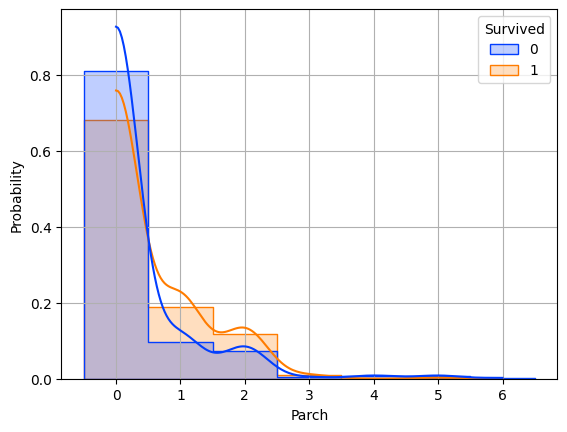

In [103]:
ax = sns.histplot(df, x="Parch", hue="Survived", stat="probability", \
                  discrete=True, common_norm=False, multiple="layer", \
                  element="step", kde=True, kde_kws={"bw_adjust": 1.5}, palette="bright")
ax.grid()

In [ ]:
df["TotalFam"] = df["Parch"] + df["SibSp"]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'TotalFam'],
      dtype='object')

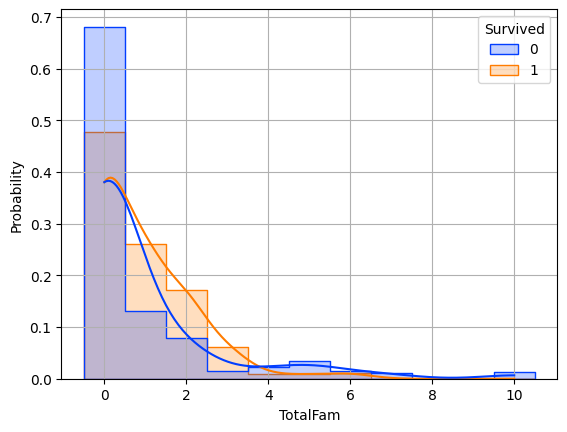

In [139]:
ax = sns.histplot(df, x="TotalFam", hue="Survived", stat="probability", \
                  discrete=True, common_norm=False, multiple="layer", \
                  element="step", kde=True, kde_kws={"bw_adjust": 1.5}, palette="bright")
ax.grid()

## Categorical attributes

In [ ]:
df["HasFam"] = df["TotalFam"] > 0

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'TotalFam', 'HasFam'],
      dtype='object')

In [155]:
def farecat(x):
    if x <= 10:
        return "Fare <= 10"
    else:
        return "10 < Fare"
    # elif 10 < x <= 50:
    #     return "10 < Fare <= 50"
    # else:
    #     return "50 < Fare"
    
df["FareCat"] = df["Fare"].map(farecat)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'TotalFam', 'HasFam',
       'FareCat'],
      dtype='object')

In [230]:
# df["AgeBracket"] = pd.Series(range(df.shape[0]), dtype="object")
df["AgeBracket"] = df["Age"].astype("object")
df.loc[df["Age"] <= 5, "AgeBracket"] = "Age <= 5"
df.loc[df["Age"] > 5, "AgeBracket"] = "5 < Age"
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'TotalFam', 'HasFam',
       'FareCat', 'AgeMissing', 'AgeBracket'],
      dtype='object')

In [170]:
df["AgeMissing"] = df["Age"].isna()
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'TotalFam', 'HasFam',
       'FareCat', 'AgeMissing'],
      dtype='object')

In [177]:
df.select_dtypes(exclude=["int64", "float64"]).columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked',
       'HasFam', 'FareCat', 'AgeMissing', 'AgeBracket'],
      dtype='object')

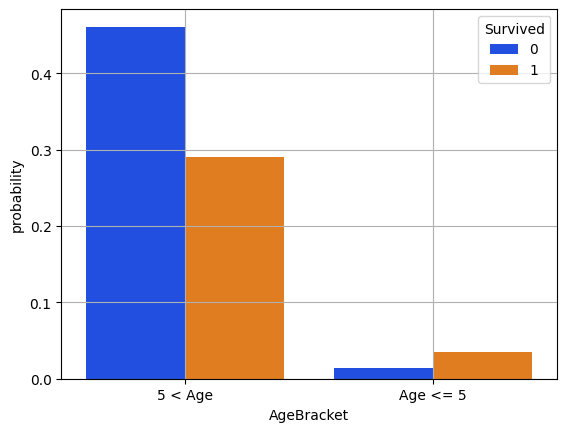

In [231]:
ax = sns.countplot(df, x="AgeBracket", hue="Survived", stat="probability", palette="bright")
ax.grid()

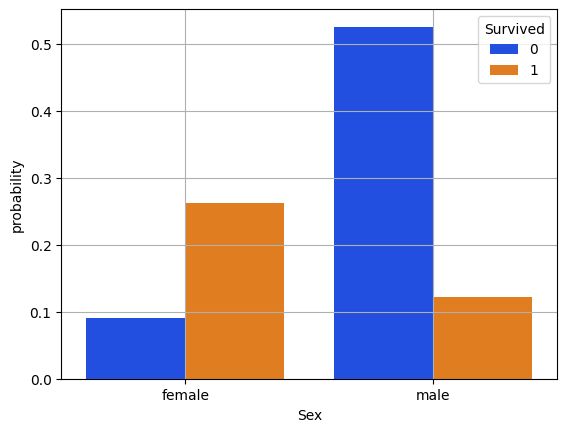

In [157]:
ax = sns.countplot(df, x="Sex", hue="Survived", stat="probability", palette="bright")
ax.grid()

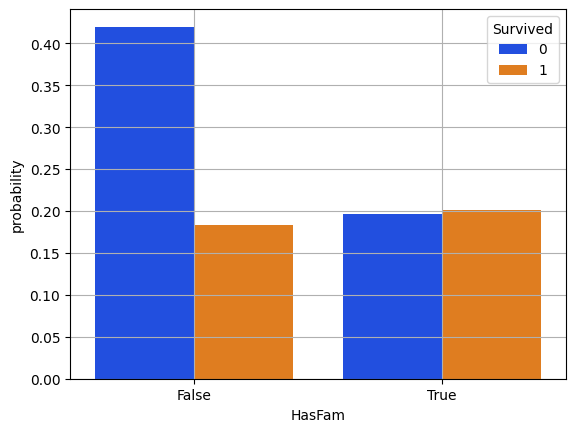

In [141]:
ax = sns.countplot(df, x="HasFam", hue="Survived", stat="probability", palette="bright")
ax.grid()

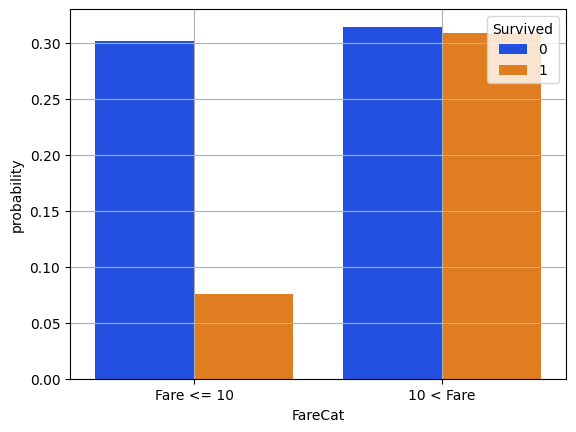

In [156]:
ax = sns.countplot(df, x="FareCat", hue="Survived", stat="probability", palette="bright")
ax.grid()

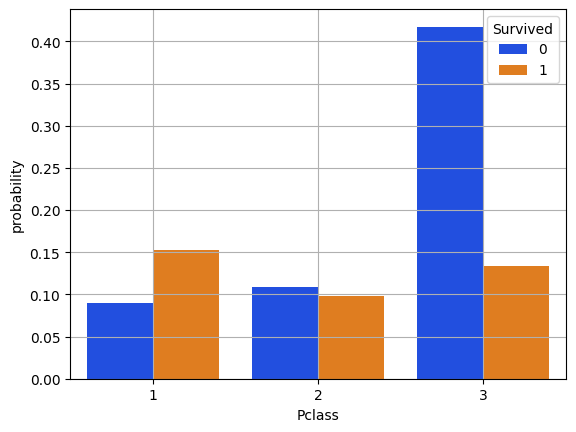

In [158]:
ax = sns.countplot(df, x="Pclass", hue="Survived", stat="probability", palette="bright")
ax.grid()

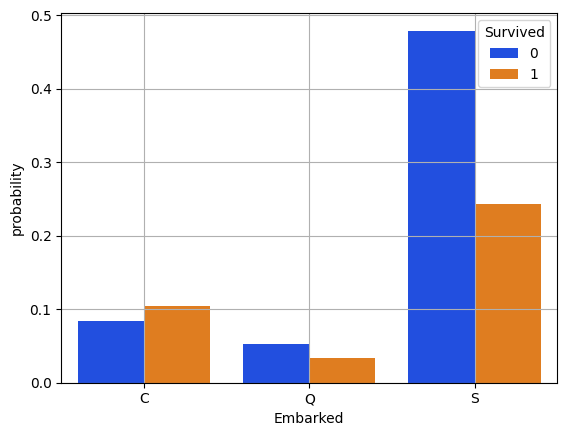

In [ ]:
# I wouldn't expect this to make a difference; this is really where we need statistical testing

ax = sns.countplot(df, x="Embarked", hue="Survived", stat="probability", palette="bright")
ax.grid()

## Cabin regex

In [169]:
df.loc[df["Cabin"].notna()].Pclass.value_counts()

Pclass
1    176
2     16
3     12
Name: count, dtype: int64

In [ ]:
def cabin_re(x):
    x = x.split()
    

x = "B51 B53 B55"

x = "C85"

1              C85
3             C123
6              E46
10              G6
11            C103
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: Cabin, Length: 204, dtype: object

# Multivariate analysis

# Missing ages

* Is AgeBracket correlated with Pclass, Sex, SibSp, Parch, TotalFam, HasFam, Fare, FareCat?
    * Older people are much more likely to have no other family on board. In fact, if HasFam=False, then the person is older than 5.
    * If Fare <= 10, then Age > 5
    * AgeBracket seems most closely correlated with FareCat and HasFam. What about the underlying numerical relationship?
* Different imputation methods

In [ ]:
corr_mat = df[["Age", "SibSp", "Parch"]].corr(method="spearman")
sns.heatmap(corr_mat, annot=True)

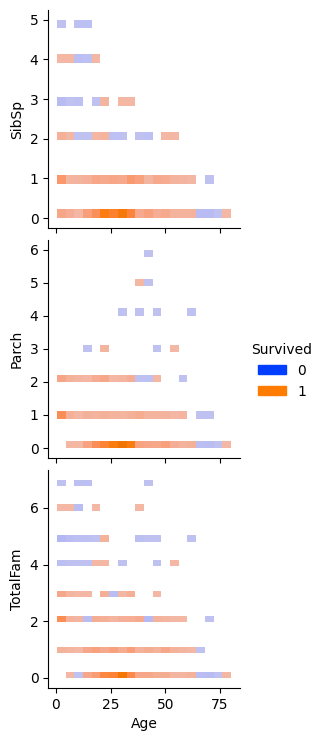

In [257]:
ax = sns.pairplot(df, x_vars="Age", y_vars=["SibSp", "Parch", "TotalFam"], hue="Survived", kind="hist", palette="bright", dropna=True)

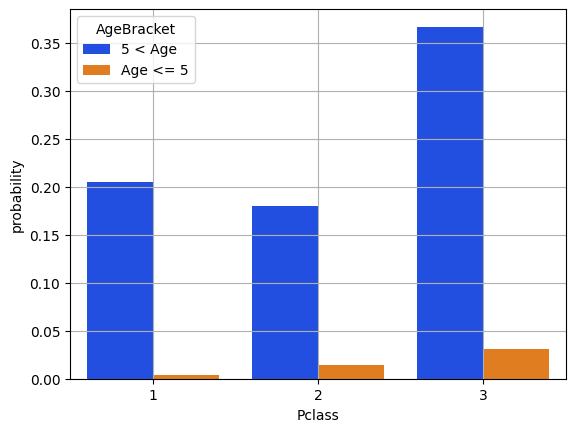

In [234]:
ax = sns.countplot(df, x="Pclass", hue="AgeBracket", stat="probability", palette="bright")
ax.grid()

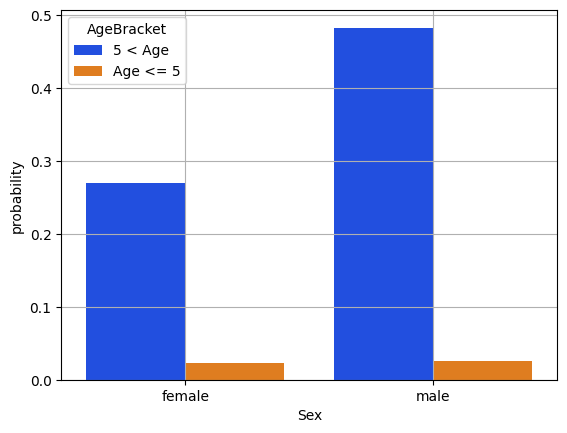

In [235]:
ax = sns.countplot(df, x="Sex", hue="AgeBracket", stat="probability", palette="bright")
ax.grid()

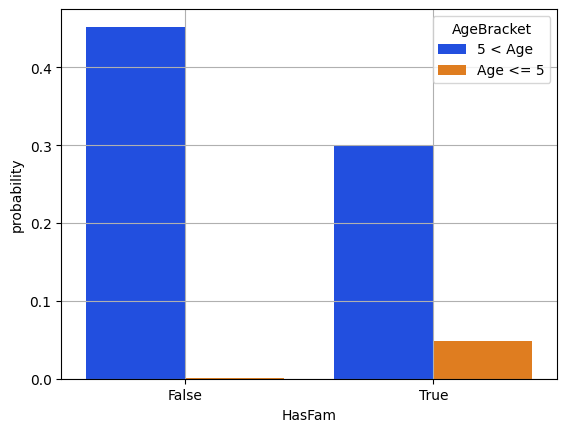

In [241]:
ax = sns.countplot(df, x="HasFam", hue="AgeBracket", stat="probability", palette="bright")
ax.grid()

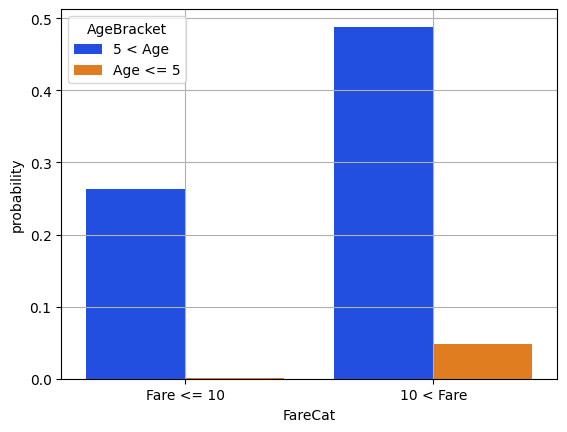

In [242]:
ax = sns.countplot(df, x="FareCat", hue="AgeBracket", stat="probability", palette="bright")
ax.grid()

In [248]:
df.loc[df["AgeBracket"].isna()].FareCat.value_counts()

FareCat
Fare <= 10    100
10 < Fare      77
Name: count, dtype: int64

In [249]:
df.loc[df["AgeBracket"].isna()].HasFam.value_counts()

HasFam
False    133
True      44
Name: count, dtype: int64

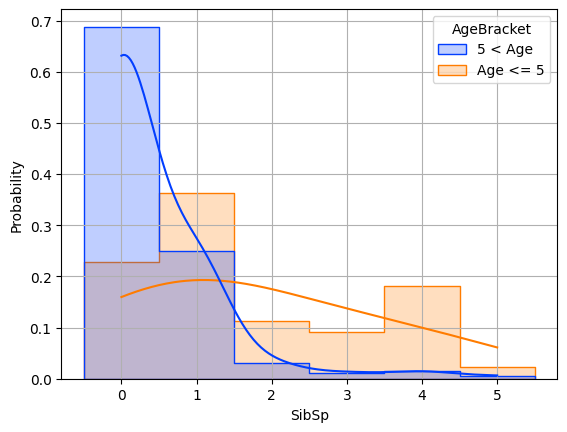

In [263]:
ax = sns.histplot(df, x="SibSp", hue="AgeBracket", stat="probability", \
                  discrete=True, common_norm=False, multiple="layer", \
                  element="step", kde=True, kde_kws={"bw_adjust": 2}, palette="bright")
ax.grid()

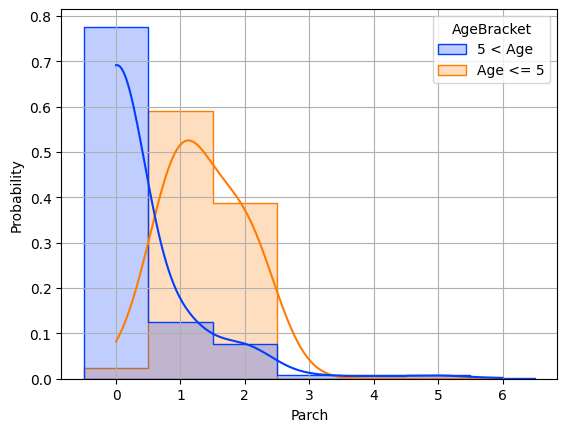

In [262]:
ax = sns.histplot(df, x="Parch", hue="AgeBracket", stat="probability", \
                  discrete=True, common_norm=False, multiple="layer", \
                  element="step", kde=True, kde_kws={"bw_adjust": 2}, palette="bright")
ax.grid()

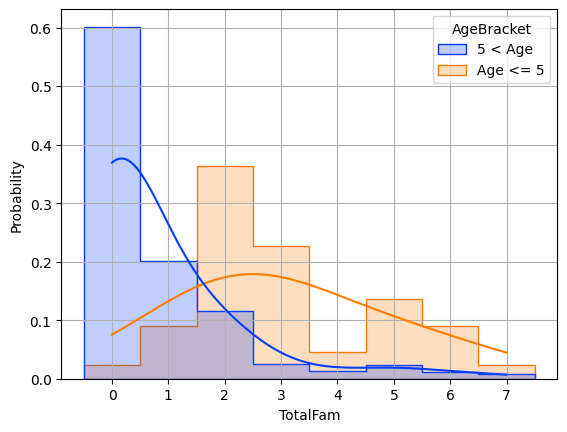

In [240]:
ax = sns.histplot(df, x="TotalFam", hue="AgeBracket", stat="probability", \
                  discrete=True, common_norm=False, multiple="layer", \
                  element="step", kde=True, kde_kws={"bw_adjust": 2}, palette="bright")
ax.grid()

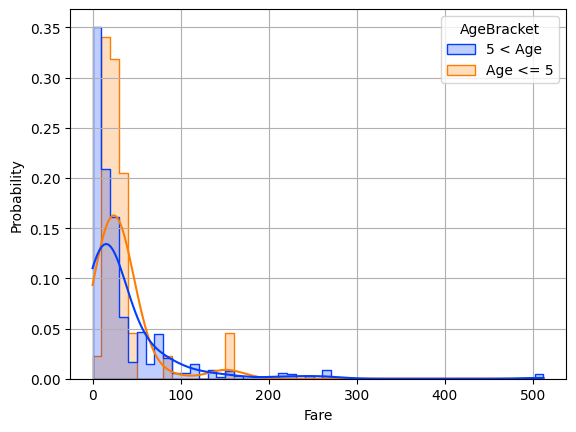

In [247]:
ax = sns.histplot(df, x="Fare", hue="AgeBracket", stat="probability", \
                  binwidth=10, common_norm=False, multiple="layer", \
                  element="step", kde=True, kde_kws={"bw_adjust": 1.5}, palette="bright")
ax.grid()

In [199]:
df.loc[(df["Age"].notna()) & (df["AgeBracket"] == "Age <= 5")].FareCat.value_counts()

FareCat
10 < Fare     43
Fare <= 10     1
Name: count, dtype: int64

In [202]:
df.loc[(df["Age"].notna()) & (df["AgeBracket"] == "5 < Age")].FareCat.value_counts()

FareCat
10 < Fare     435
Fare <= 10    235
Name: count, dtype: int64

In [201]:
df.loc[df["Age"].isna()].FareCat.value_counts()

FareCat
Fare <= 10    100
10 < Fare      77
Name: count, dtype: int64

In [200]:
df.FareCat.value_counts()

FareCat
10 < Fare     555
Fare <= 10    336
Name: count, dtype: int64